In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Loading Dataset

In [ ]:
df = pd.read_csv("drive/MyDrive/Dataset/rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df = df.dropna(subset=['price']).reset_index()

In [ ]:
df.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

In [ ]:
# Hapus fitur yang tidak memiliki dependency terhadap predictand (price)
# karena sudah ada atribut jarak dan parameter waktu (hours, day, month)
# hapus fitur latitude, longitude dan datetime dari datafram
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
             'windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
             'apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'],
            axis=1)
print(df.shape)
df.head()

(637976, 41)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [ ]:
# cek korelasi antara fitur price dan fitur yang memiliki relasi dengan temperature
new_df = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
new_df.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<Axes: >

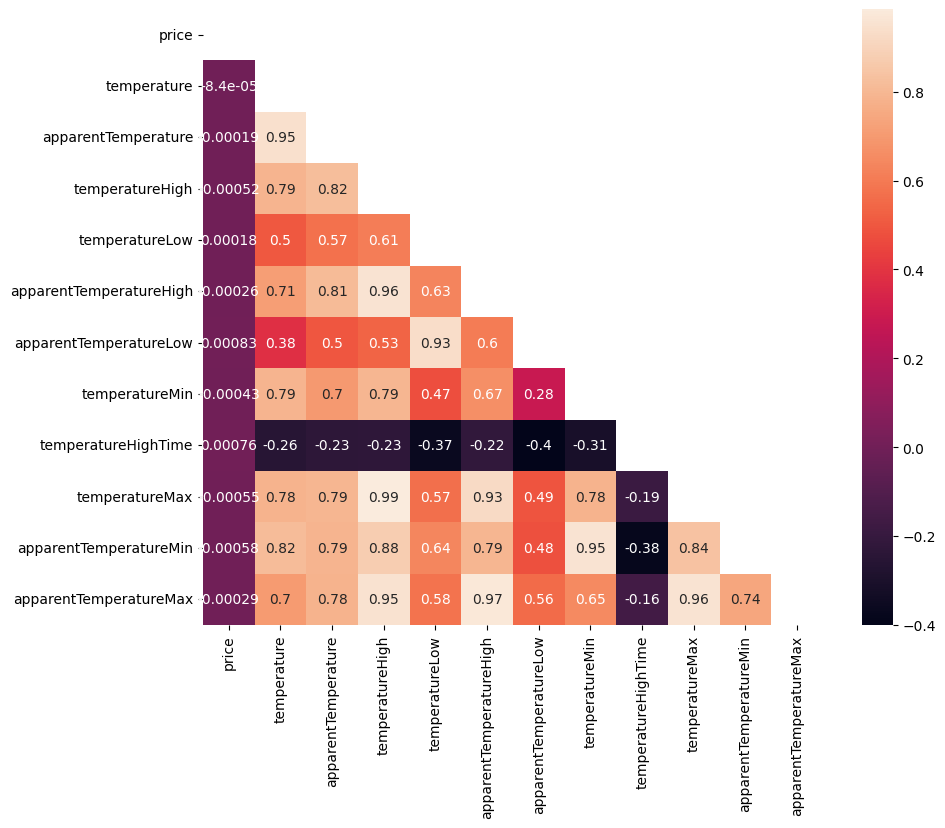

In [ ]:
# gunakan heatmap plot dengan correlation untuk melihat rate korelasi pada dataframe baru
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, mask=np.triu(new_df.corr()))

Hapus semua fitur yang berhubungan dengan temperatur dari dataframe karena mereka memiliki korelasi yang lemah terhadap predictand (price)

In [ ]:
new_df = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]
df = df.drop(new_df.columns, axis=1)
print(df.shape)
df.head()

(637976, 30)


,index,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [ ]:
# eksplorasi dan analisis data pada fitur dengan tipe categorical
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
new_data = df[categorical_cols]
new_data.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [ ]:
# cek nilai unik pada setiap kolom yang bertipe categorical
for col in new_data:
    print(f"{col} :{new_data[col].unique()}")
    print()

timezone :['America/New_York']

source :['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination :['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type :['Lyft' 'Uber']

product_id :['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name :['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary :[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' 

In [ ]:
new_data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [ ]:
# hapus timezone karena sebagian besar data nya (>50%) hanya berisi data sampah
df = df.drop(['timezone','product_id'], axis=1)
df.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [ ]:
#analisis kolom/fitur yang memiliki tipe numerical
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
new_data = df[num_cols]
new_data.columns

Index(['index', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'moonPhase', 'precipIntensityMax'],
      dtype='object')

In [ ]:
#analisis dan cek tingkat korelasi antara fitur yang berhubungan dengan cuaca dan price
climate_cols = ['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax',]
new_data = df[climate_cols]
new_data.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<Axes: >

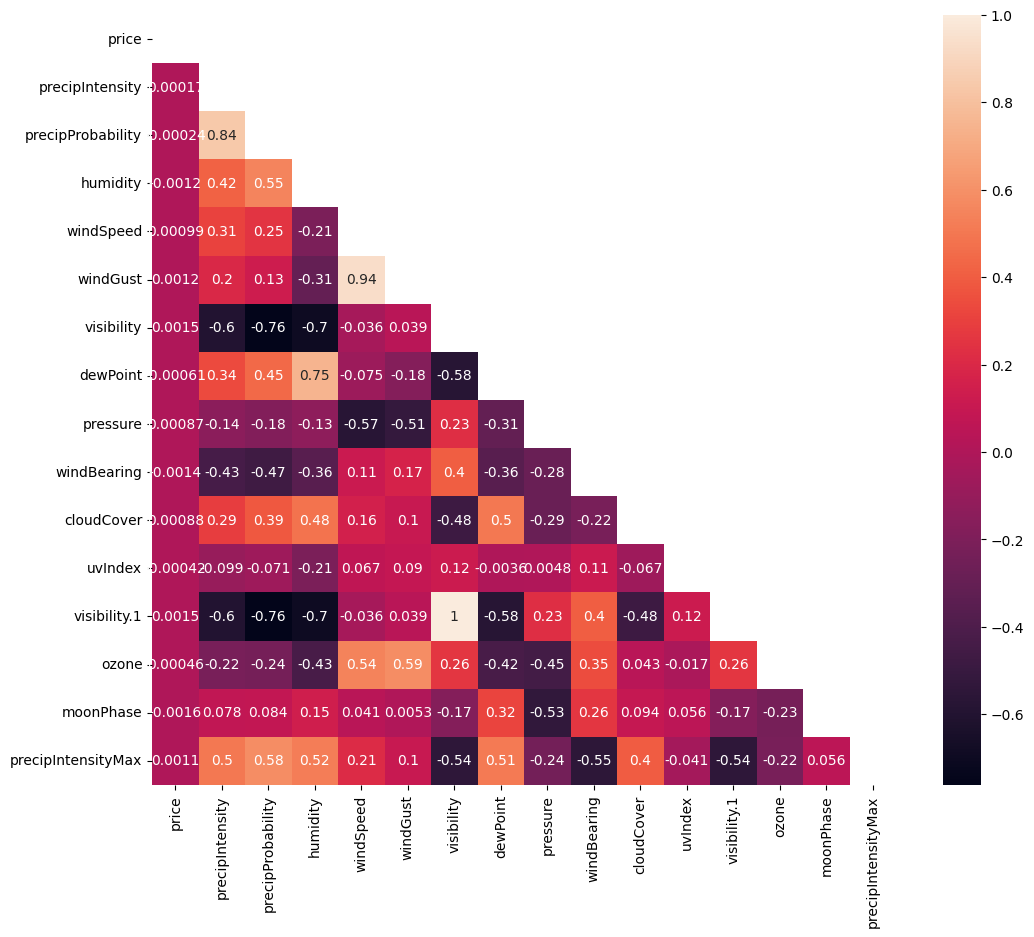

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

semua fitur yang berhubungan dengan cuaca memiliki korelasi yang rendah hampir 0 terhadap kolom price. drop kolom kolom tersebut

In [ ]:
climate_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df = df.drop(climate_cols, axis=1)
print(df.shape)
df.head()

(637976, 13)


,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [ ]:
df.shape

(637976, 13)

In [ ]:
df.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


## Exploratory Data Analysis

## Data Preprocessing

In [ ]:
# Binary encode kolom cab_type
df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [ ]:
#Encoding semua kolom bertipe cateogory dengan onehot encoder
from sklearn.preprocessing import OneHotEncoder
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['source', 'destination', 'name', 'short_summary', 'icon']


In [ ]:
df.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Haymarket Square,North Station,0,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Haymarket Square,North Station,0,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Haymarket Square,North Station,0,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Haymarket Square,North Station,0,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Haymarket Square,North Station,0,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [ ]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)

In [ ]:
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberX

In [ ]:
# analisis dan cek korelasi antara price dengan kolom yang berhubungan dengan source
source_cols = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
               'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
               'source_Northeastern University', 'source_South Station','source_Theatre District',
               'source_West End']
new_data = df[source_cols]
new_data.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

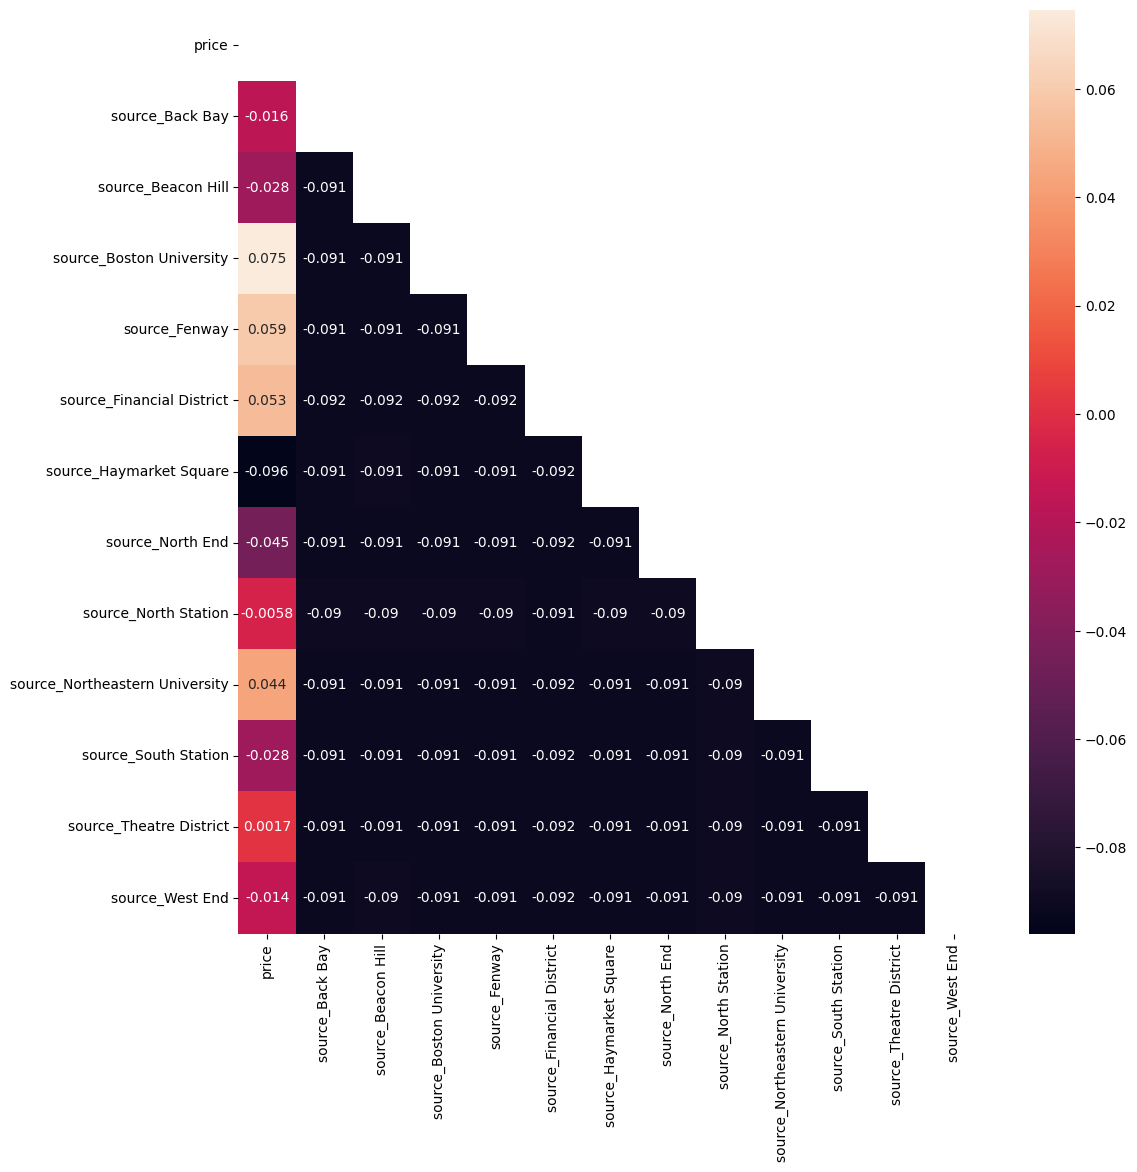

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

kolom yang berhubungan dengan source memiliki pengaruh yang cukup signifikan terhadap price. kemudian cek kolom destinasi dengan cara yang sama untuk melihat rate korelasi terhadap price

In [ ]:
destination_cols =['price','destination_Back Bay','destination_Beacon Hill', 'destination_Boston University',
                   'destination_Fenway', 'destination_Financial District','destination_Haymarket Square',
                   'destination_North End','destination_North Station', 'destination_Northeastern University',
                   'destination_South Station', 'destination_Theatre District','destination_West End']
new_data = df[destination_cols]
new_data.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

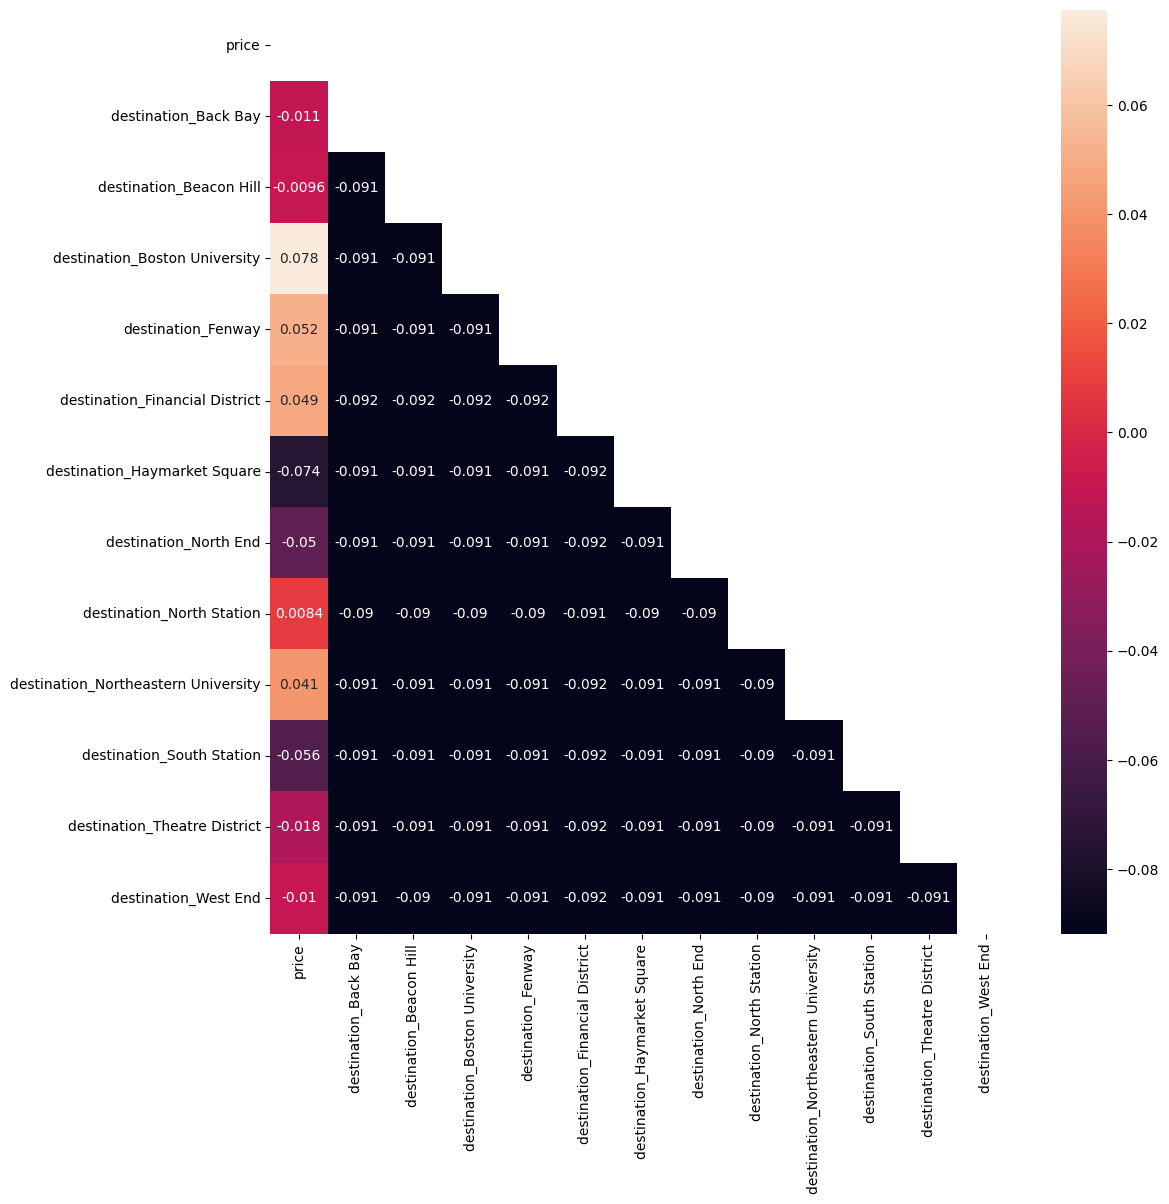

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

dari plotting heatmap diatas menunjukkan bahwa nilai korelasi dari source dan destination terhadap harga sangat rendah, jadi hapus mereka dan merestrukturisasi dataframe

In [ ]:

drop_cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
df = df.drop(drop_cols, axis=1)
print(df.shape)
df.head()

(637976, 36)


,index,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# cek korelasi dari kolom summary dengan price
summary_cols = ['price','short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
                'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
                'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ']
new_data = df[summary_cols]
new_data.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

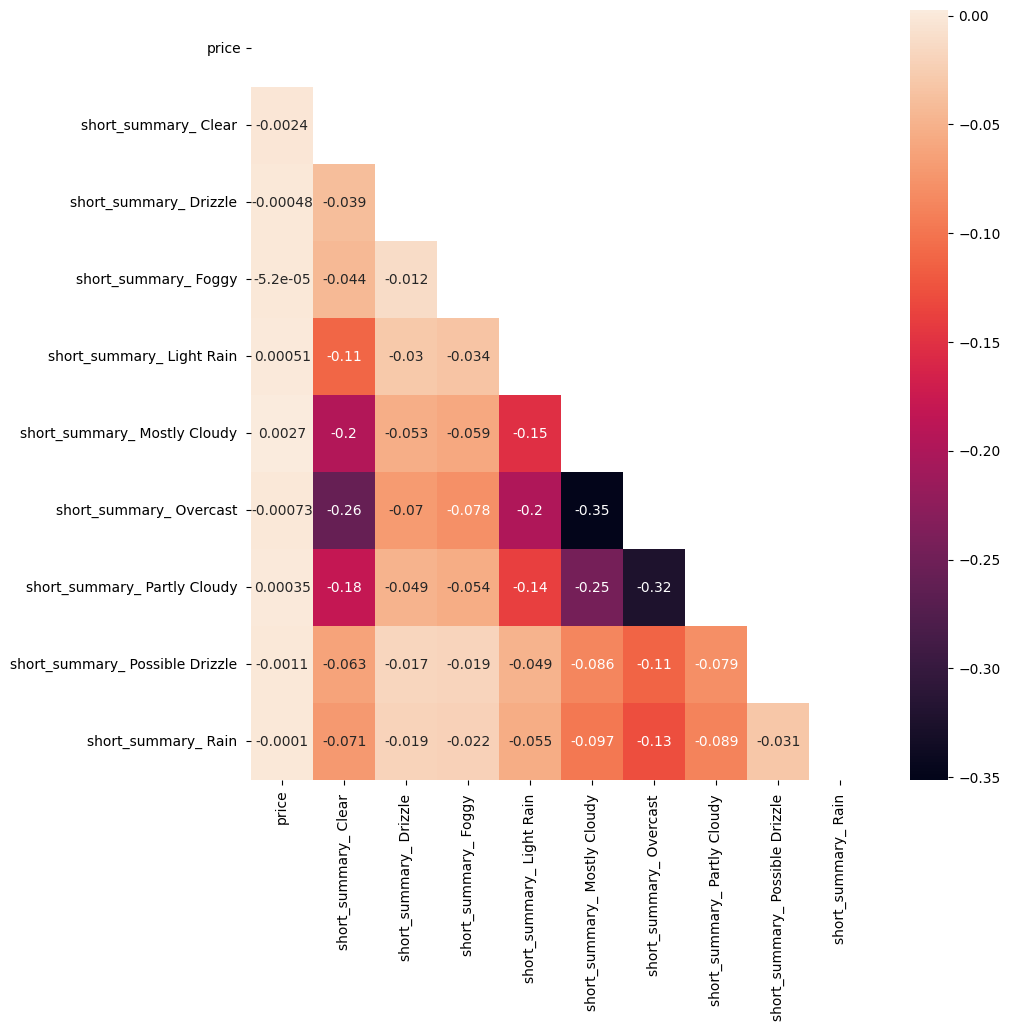

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True,mask=np.triu(new_data.corr()))

<Axes: >

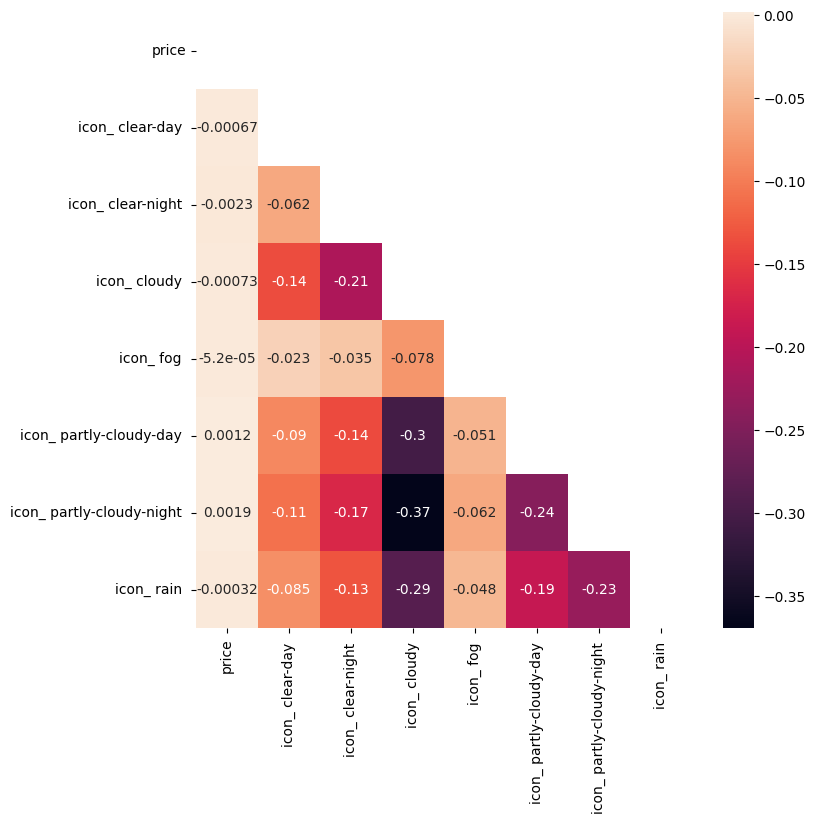

In [ ]:
# cek korelasi antara kolom icon dan price
icon_cols= ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ','icon_ rain ']
new_data = df[icon_cols]
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(),annot=True,mask=np.triu(new_data.corr()))

dapat dilihat bahwa kolom summary dan kolom icon tidak ada pengaruh ke price karena nilai korelasi mereka terlalu rendah (hampir 0) jadi drop kolom kolom tersebut

In [ ]:
drop_cols = ['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
             'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
             'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
             'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ',
             'icon_ partly-cloudy-night ','icon_ rain ']
df = df.drop(drop_cols,axis=1)
print(df.shape)
df.head()

KeyError: ignored

In [ ]:
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

<Axes: >

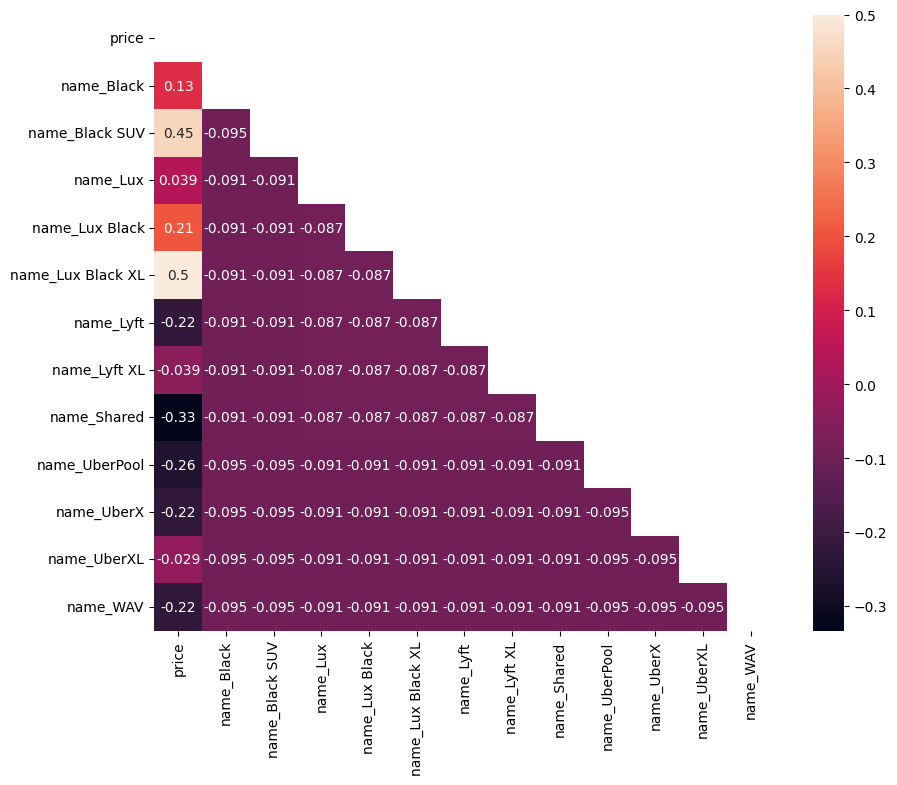

In [ ]:
# analisis kolom nama dengan price
name_cols = ['price','name_Black', 'name_Black SUV','name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool','name_UberX', 'name_UberXL', 'name_WAV']
new_data = df[name_cols]
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),annot=True, mask=np.triu(new_data.corr()))

beberapa nilai dari kolom name memiliki pengaruh terhadap nilai price

In [ ]:
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain ', 'icon_ clear-day ', 'icon_ clear-night ',
       'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ',
       'icon_ partly-cloudy-night ', 'icon_ rain '],
      dtype='object')

<Axes: >

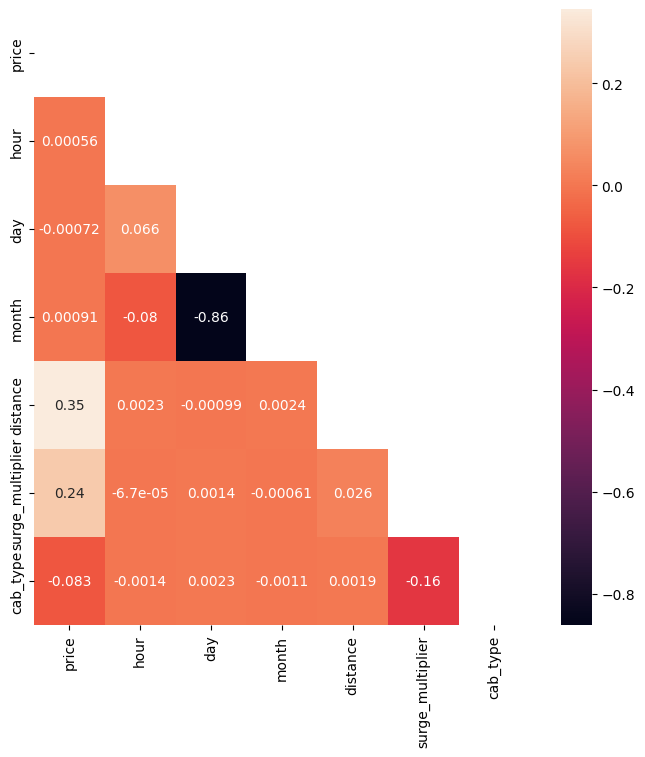

In [ ]:
# analisis sisa kolom
remaining_cols = ['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type']
new_data = df[remaining_cols]
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(),annot=True,mask=np.triu(new_data.corr()))

dari hasil analisis terhadap kolom kolom tersebut bisa dilihat bahwa fitur hour, day, month memiliki korelasi yang rendah. tetapi, kolom distance dan surge_multiplier memiliki korelasi yang bagus dengan price. jadi drop kolom kolom yang memiliki korelasi yang rendah

In [ ]:
df = df.drop(['hour', 'day', 'month'], axis=1)
print(df.shape)
df.head()

(637976, 33)


,index,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# cek nilai null pada semua fitur
df.isnull().sum()

index                               0
cab_type                            0
price                               0
distance                            0
surge_multiplier                    0
name_Black                          0
name_Black SUV                      0
name_Lux                            0
name_Lux Black                      0
name_Lux Black XL                   0
name_Lyft                           0
name_Lyft XL                        0
name_Shared                         0
name_UberPool                       0
name_UberX                          0
name_UberXL                         0
name_WAV                            0
short_summary_ Clear                0
short_summary_ Drizzle              0
short_summary_ Foggy                0
short_summary_ Light Rain           0
short_summary_ Mostly Cloudy        0
short_summary_ Overcast             0
short_summary_ Partly Cloudy        0
short_summary_ Possible Drizzle     0
short_summary_ Rain                 0
icon_ clear-

cek outliers, cek nilai min dan max threshold dan plot kolom price ke box plot

In [ ]:
max_threshold = df['price'].quantile(0.99)
min_threshold = df['price'].quantile(0.01)

print(f'Max Threshold = {max_threshold}')
print(f'Min Threshold = {min_threshold}')

Max Threshold = 42.5
Min Threshold = 3.5


In [ ]:
df[df['price']>max_threshold]

,index,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
645,706,0,52.5,3.25,2.00,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
646,707,0,67.5,3.25,2.00,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
706,769,0,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1005,1094,0,45.5,4.31,1.00,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1210,1318,0,45.5,5.33,1.00,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,1,47.0,5.56,1.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637637,692698,0,52.5,4.58,1.25,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
637813,692891,0,47.5,5.42,1.00,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
637878,692962,1,51.0,7.36,1.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

min_threshold = df['price'].quantile(0.01)
min_threshold

3.5

In [ ]:
df[df['price']<min_threshold]

,index,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
8,8,0,3.0,1.08,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50,53,0,3.0,0.71,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,174,0,3.0,1.40,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
312,336,0,3.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
361,390,0,3.0,0.64,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637611,692670,0,3.0,1.69,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637660,692723,0,3.0,3.08,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
637705,692772,0,3.0,0.70,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
637779,692854,0,3.0,3.13,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

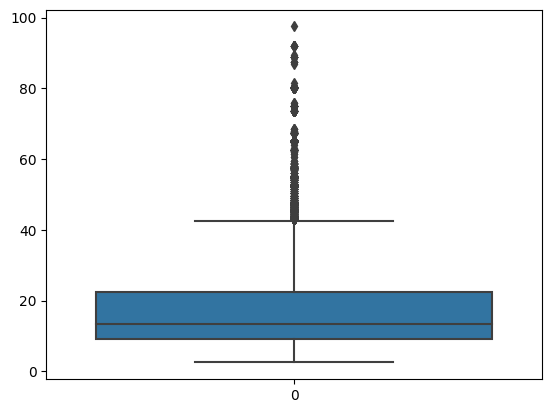

In [ ]:
sns.boxplot(df['price'])

In [ ]:
outliers = np.where(df['price']>42.5)
print(outliers[0])
print(np.count_nonzero(np.where(df['price']>42.5)))

[   645    646    706 ... 637813 637878 637917]
5589


Hapus semua 5357 baris pada array tersebut, karena jika outliers tersebut diikutkan nilai error akan bertambah

In [ ]:
df.drop(outliers[0], inplace=True)
df.shape

(632387, 33)

distance
0.7767567965635372


<Figure size 640x480 with 0 Axes>

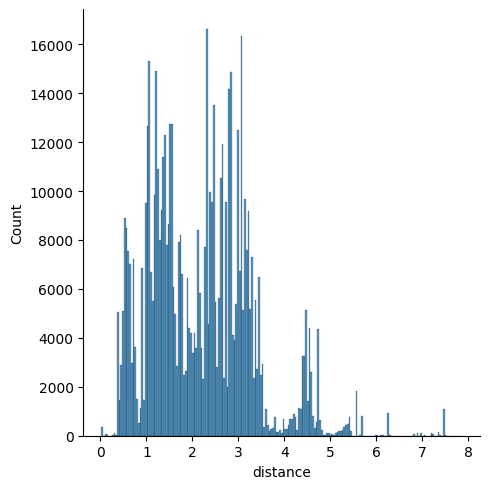

surge_multiplier
8.847590589161022


<Figure size 640x480 with 0 Axes>

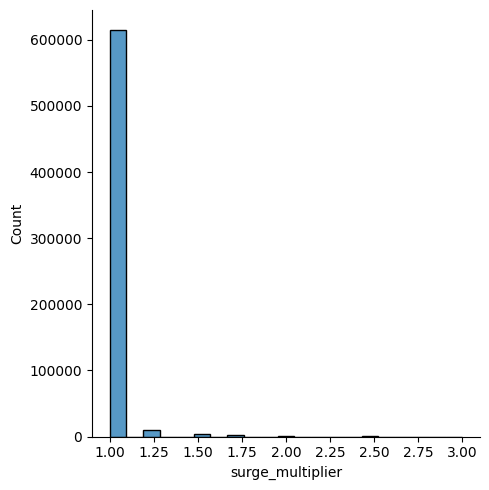

In [ ]:
# cek skewness pada semua fitur
from scipy.stats import skew
columns = ['distance', 'surge_multiplier']
for col in columns:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.displot(df[col])
    plt.show()


kolom distance dan surge multiplier memiliki skew yang sangat tinggi dengan nilai 0.77 dan 8.84. cek nilai korelasi pada kolom kolom tersebut terhadap predictand(price)

<Axes: >

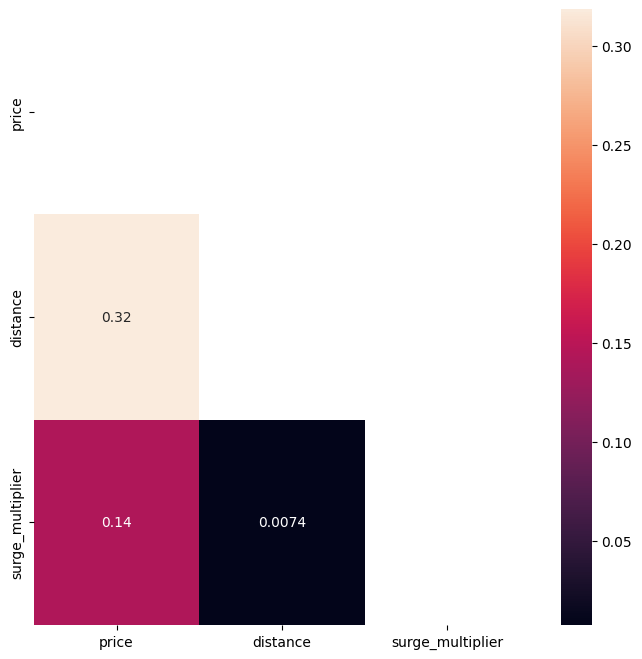

In [ ]:
columns = ['price','distance','surge_multiplier']
new_df = df[columns]
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(), annot=True, mask=np.triu(new_df.corr()))


surge multiplier memiliki nilai skew yang tinggi dan korelasi yang kurang dengan predictand (price), dimana kolom distance meliki korelasi yang baik.jadi hapus skewneww dari surge multiplier menggunakan transformasi BoxCox.Transformasi Box-Cox merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians.

In [ ]:
from scipy import stats
df['surge_multiplier'] = stats.boxcox(df['surge_multiplier'])[0]
pd.Series(df['surge_multiplier']).skew()

5.64331840785854

Skewness dari kolom Surge_multiplier dikurangi dari 8.84 menjadi 5.64



In [ ]:
df.price.describe()

count    632387.000000
mean         16.245314
std           8.769536
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          42.500000
Name: price, dtype: float64

In [ ]:
df.columns

Index(['index', 'cab_type', 'price', 'distance', 'surge_multiplier',
       'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain ', 'icon_ clear-day ', 'icon_ clear-night ',
       'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ',
       'icon_ partly-cloudy-night ', 'icon_ rain '],
      dtype='object')

In [ ]:
df.drop(columns=['index'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'short_summary_ Clear ',
       'short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
       'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain '],
      dtype='object')

In [ ]:

df.rename(columns={'name_Black':'Uber Black','name_Black SUV':'Uber Black SUV', 'name_Lux':'Lyft Lux',
                   'name_Lux Black':'Lyft Lux Black','name_Lux Black XL':'Lyft Lux Black XL','name_Lyft':'Lyft',
                   'name_Lyft XL':'Lyft XL', 'name_Shared':'Lyft Shared', 'name_UberPool':'Uber Pool',
                   'name_UberX':'Uber X', 'name_UberXL':'Uber XL', 'name_WAV':'Uber WAV'}, inplace=True)

In [ ]:
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'Uber Black',
       'Uber Black SUV', 'Lyft Lux', 'Lyft Lux Black', 'Lyft Lux Black XL',
       'Lyft', 'Lyft XL', 'Lyft Shared', 'Uber Pool', 'Uber X', 'Uber XL',
       'Uber WAV', 'short_summary_ Clear ', 'short_summary_ Drizzle ',
       'short_summary_ Foggy ', 'short_summary_ Light Rain ',
       'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ',
       'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ',
       'short_summary_ Rain ', 'icon_ clear-day ', 'icon_ clear-night ',
       'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ',
       'icon_ partly-cloudy-night ', 'icon_ rain '],
      dtype='object')

In [ ]:
df.drop(columns=['cab_type'], inplace=True)
df.head()

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = df['price']
y.head(3)

0     5.0
1    11.0
2     7.0
Name: price, dtype: float64

In [ ]:
X = df.drop(columns=['price'], axis=1)
X.head()

,distance,surge_multiplier,Uber Black,Uber Black SUV,Lyft Lux,Lyft Lux Black,Lyft Lux Black XL,Lyft,Lyft XL,Lyft Shared,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling - splitting data train and data testing


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model_LR = LinearRegression()
model1 = model_LR.fit(x_train, y_train)
ypred1 = model1.predict(x_test)

model_RF = RandomForestRegressor(n_estimators = 500, random_state = 42)
model_RF.fit(x_train, y_train)
predictions = model_RF.predict(x_test)
ypred2 = model_RF.predict(x_test)

IMPLEMENTASI MODEL DENGAN LINEAR RERESSION ::
Linear Regression train R squared: 0.9306
Linear Regression test R squared: 0.9311
Linear Regression test RMSE: 2.3020
Linear Regression test MAE: 1.3002
Linear Regression Accuracy: 86.93 %.


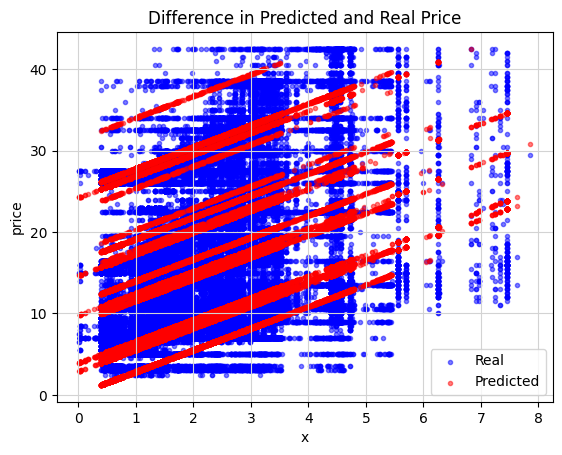

In [ ]:
print('IMPLEMENTASI MODEL DENGAN LINEAR REGRESSION ::')
model_LR = LinearRegression()
model1 = model_LR.fit(x_train, y_train)
ypred1 = model1.predict(x_test)
lr_xtrain_r2 = model_LR.score(x_train, y_train)
lr_xtest_r2 = model_LR.score(x_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_xtrain_r2)
print('Linear Regression test R squared: %.4f' % lr_xtest_r2)

lr_mse = mean_squared_error(ypred1, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

lr_mae = metrics.mean_absolute_error(y_test, ypred1)
lr_rootmae = np.sqrt(lr_mae)
print('Linear Regression test MAE: %.4f' % lr_rootmae)

errors = abs(ypred1 - y_test)
mape = 100 * (errors / y_test)
lr_accuracy = 100 - np.mean(mape)
print('Linear Regression Accuracy:', round(lr_accuracy, 2), '%.')

# Define x axis
x_axis = x_test.distance

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, ypred1, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('x')
plt.ylabel('price')
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

:: IMPLEMENTASI EVALUASI MODEL DENGAN RANDOM FOREST ::
Random Forest Lyft train R squared is: 0.9625
Random Forest Lyft test R squared": 0.9607
Random Forest Lyft RMSE: 1.7380
Random Forest test MAE: 1.0702
Random Forest Lyft Accuracy: 91.5 %.


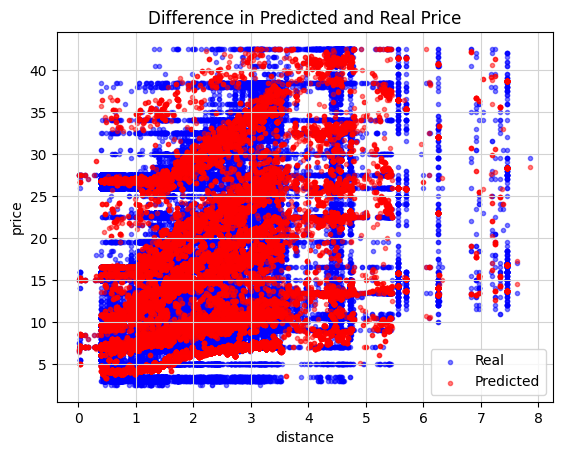

In [ ]:
print(':: IMPLEMENTASI EVALUASI MODEL DENGAN RANDOM FOREST ::')
model_RF = RandomForestRegressor(n_estimators = 500, random_state = 42)
model_RF.fit(x_train, y_train)
ypred2 = model_RF.predict(x_test)
rf_train_r2 = model_RF.score(x_train,y_train)
rf_test_r2 = model_RF.score(x_test, y_test)
print('Random Forest Lyft train R squared is: %.4f' % rf_train_r2)
print('Random Forest Lyft test R squared": %.4f' % rf_test_r2)

predictions = model_RF.predict(x_test)
RF_mse = mean_squared_error(predictions, y_test)
RF_rmse = np.sqrt(RF_mse)
print('Random Forest Lyft RMSE: %.4f' % RF_rmse)

RF_mae = metrics.mean_absolute_error(y_test, ypred2)
RF_rootmae = np.sqrt(RF_mae)
print('Random Forest test MAE: %.4f' % RF_rootmae)

errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
RF_accuracy = 100 - np.mean(mape)
print('Random Forest Lyft Accuracy:', round(RF_accuracy, 2), '%.')

'''characteristics = lyft_X.columns
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];'''

# Define x axis
x_axis = x_test.distance

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Difference in Predicted and Real Price")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
model_data = {"Model": ["Linear Regression", "Random Forest",],
"Train R2": [lr_xtrain_r2, rf_train_r2],
"Test R2": [lr_xtest_r2, rf_test_r2],
"Test RMSE": [lr_rmse, RF_rmse],
"Test MAE" : [lr_rootmae, RF_rootmae],
"Accuracy": [lr_accuracy, RF_accuracy]}

summary_table = pd.DataFrame(model_data)
display(summary_table)

,Model,Train R2,Test R2,Test RMSE,Test MAE,Accuracy
0,Linear Regression,0.930638,0.931091,2.301984,1.300218,86.928671
1,Random Forest,0.962536,0.960719,1.738027,1.070200,91.502154


In [ ]:
model1.coef_

array([ 2.67264011e+00,  6.40646482e+02,  4.24912410e+00,  1.38258501e+01,
        9.73445704e-01,  6.10476789e+00,  1.47207298e+01, -7.14029204e+00,
       -1.45741018e+00, -1.02090029e+01, -7.49244700e+00, -6.48703424e+00,
       -5.98369843e-01, -6.48936137e+00])

In [ ]:
model1.intercept_

10.392610514101605

## Model Evaluation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

cross_val_score(LinearRegression(), X, y, cv=cross_val)

In [ ]:
cross_val_score( RandomForestRegressor(), X, y, cv=cross_val)

In [ ]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return model_RF.predict([x])[0]

In [ ]:
predict_price('Lyft Lux',0.44,0.0)

In [ ]:
predict_price('Lyft',0.44,0.0)

In [ ]:
predict_price('Uber WAV',0.44,0.0)

In [ ]:
predict_price('Lyft Shared',0.44, 0.0)

In [ ]:
predict_price('Uber X',0.44, 0.0)

In [ ]:
predict_price('Lyft Lux Black',0.44, 0.0)

In [ ]:
predict_price('Lyft Lux Black XL',1.0, 0.0)

In [ ]:
predict_price('Uber Pool',1.0, 0.0)

In [ ]:
predict_price('Uber Black',1.0, 0.0)

In [ ]:

predict_price('Uber Black SUV',1.5, 0.0)

In [ ]:
# simpan model kedalam file dengan pickle
import pickle
pickle.dump(model, open('./predict_price_model.pkl','wb'))

In [ ]:
X.columns

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

## Kesimpulan

Dataset ini memiliki dimensi yang tinggi yaitu 693071 × 57. dengan begitu banyaknya fitur perlu diketahui fitur mana saja yang memiliki korelasi yang cukup, hal itu sangat berguna ketika dalam proses prediksi. dikarenakan tujuan utama dalam projek ini adalah untuk memprediksi hargra maka fitur price merupakan variabel dependent yang akan menjadi predictand. Dalam proses pemilihan fitur dapat dilakukan dengan menggunakan fungsi correlation dan juga bantuan visualisasi dari heatmap plot. setelah dilakukan analisis dengan menggunakan fungsi korelasi dan heatmap plot  dari 57 fitur kami mengambil fitur distance, surge_multiplier dan name_cab karena fitur-fitur tersebut memiliki korelasi yang cukup berpengaruh ke variabel dependent(price). Pada section EDA bisa dilihat bahwa Top 5 source-destination pada cab jenis uber dan lyft adalah sama, yaitu : Financial District-South Station (dan sebaliknya), Back Bay-North End (dan sebaliknya), West End-Fenway. Transaksi berdasarkan nama cab pada cab jenis uber dan lyft memiliki hasil yang sama tetapi beda jumlah nilai, berdasarkan fitur short_summary jumlah transaksi tertinggi terjadi pada hari ketika mendung data dan transaksi terendah pada hari ketika mengalami grimis.Harga tertinggi pada cab jenis uber yaitu Black SUV dan level harga terendah adalah UberPool, sedangkan pada cab jenis Lyft dengan nama Lux Black XL memiliki level harga tertinggi dengan nilai diatas 30 sedangkan level harga terendah yaitu cab jenis Lyft Shared.
Untuk membuat model prediksi, pada projek ini menggunakan algoritma Linear Regression. Proses prediksi menggunakan  R2 score dengan memanfaatkan library scikit-learn untuk mempermudah proses. R2 score merupakan salah satu metode yang digunakan untuk mengukur performa evaluasi pada regression. Hasil prediksi diatas dapat dilihat bahwa model prediksi menghasilkan nilai sebesar 0.93 atau 93% yang mana hasil tersebut menunjukkan nilai prediksi yang baik.